<a href="https://colab.research.google.com/github/gui98araujo/Amb_Git/blob/main/Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset={"tempo":[1,3,4,4,6,8,10,10,11,13],
         "vendas":[91,110,106,116,119,129,139,143,138,159]
         
    

}
dataset=pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


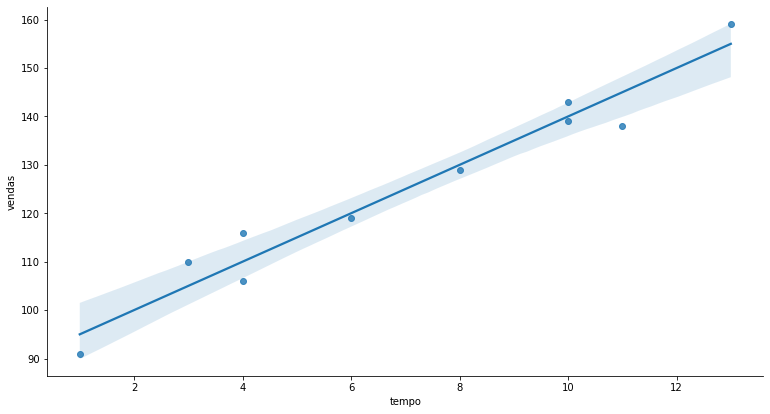

In [3]:
#Gráfico de dispersão
ax=sns.lmplot(x="tempo",y="vendas", data=dataset)
ax.fig.set_size_inches(12,6)
ax.fig.subtitle("Reta de regressão")

In [4]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [5]:
#Estimar o y 
import statsmodels.api as sm

In [6]:
Y=dataset.vendas #variável target
X=sm.add_constant(dataset.tempo) # Quando formos usar ols, vamos querer verificar o intercept, por isso usamos o add_constant.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
resultado_regressao=sm.OLS(Y,X).fit() #Treinar o resultado da regressão

In [8]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.22e-06
Time:                        11:17:24   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [9]:
#Verificar resíduo
dataset[ "Y_previsto"]=resultado_regressao.predict()
dataset.head()

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [11]:
dataset['residuo']=dataset['Y_previsto']-dataset['vendas']
dataset.head()

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


In [14]:
df=pd.read_excel('/content/C├│pia de aprovacao_alunos (1).xlsx')

In [15]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


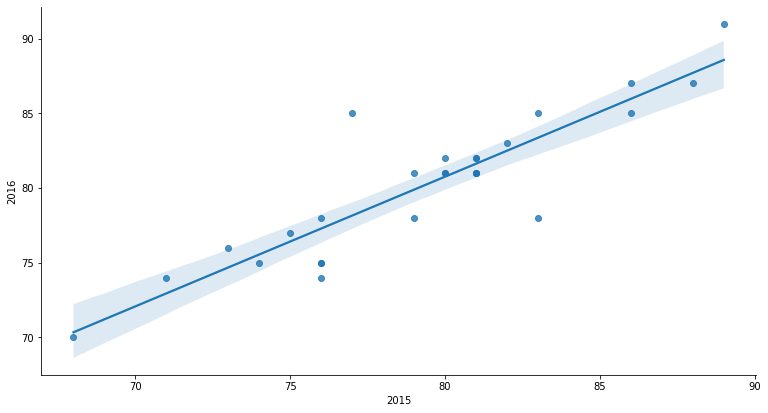

In [17]:
ax=sns.lmplot(x="ano_2015",y="ano_2016", data=df)
ax.fig.set_size_inches(12,6)
ax.set_xlabels('2015')
ax.set_ylabels('2016')

In [18]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [19]:
Y=df.ano_2016
x=sm.add_constant(df.ano_2015)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
resultado_regressao=sm.OLS(Y,x).fit()

In [22]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           3.02e-10
Time:                        11:42:43   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [23]:
df['Y_previsto']=resultado_regressao.predict()

In [24]:
df.head()

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [25]:
df['residuo']=df['Y_previsto']-df['ano_2016']

In [26]:
df

,UF,ano_2015,ano_2016,Y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
5,Amapa,76,75,77.291450,2.291450
6,Tocantins,81,82,81.632053,-0.367947
7,Maranhao,81,81,81.632053,0.632053
8,Piaui,80,81,80.763932,-0.236068
9,Ceara,86,85,85.972655,0.972655
